### Code Implementation

In [1]:
# Importing necessary libraries
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
import pickle
import numpy as np
import cv2
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

### Loading Dataset

In [2]:
# Opening file for reading in binary mode
#- data3.pickle - Shuffling, /255.0 + Mean + STD Normalization
with open('D:\Project\Traffic Sign Detection\DATABASE/data0.pickle', 'rb') as f:
    data = pickle.load(f, encoding='latin1')  # dictionary type
    
    
# Making channels come at the end
data['x_train'] = data['x_train'].transpose(0, 2, 3, 1)
data['x_validation'] = data['x_validation'].transpose(0, 2, 3, 1)
data['x_test'] = data['x_test'].transpose(0, 2, 3, 1)

train_imgs = data['x_train']
test_imgs = data['x_test']
valid_imgs = data['x_validation']
train_labels = data['y_train']
test_labels = data['y_test']
valid_labels = data['y_validation']

In [3]:
def canny(x):
    for i in range(0 , x.shape[0]):
        # enh = ImageEnhance.Brightness(Image.fromarray(np.uint8(x[i]* 255)))
        # enh_img = enh.enhance(2)
        x[i,:,:,0] = cv2.Canny(x[i], 100, 150)

        
    return x[:,:,:,0]
        

In [4]:
A = np.array(np.where(train_labels >= 18))
A = np.concatenate((A ,np.where(train_labels == 13)), axis = 1)
A = np.concatenate((A ,np.where(train_labels == 11)), axis = 1)
B = np.array(np.where(train_labels > 31))
indx = np.setdiff1d(A, B)

A = np.array(np.where(test_labels >= 18)) 
A = np.concatenate((A ,np.where(test_labels == 13)), axis = 1)
A = np.concatenate((A ,np.where(test_labels == 11)), axis = 1)
B = np.array(np.where(test_labels > 31))
indx1 = np.setdiff1d(A, B)

A = np.array(np.where(valid_labels >= 18)) 
A = np.concatenate((A ,np.where(valid_labels == 13)), axis = 1)
A = np.concatenate((A ,np.where(valid_labels == 11)), axis = 1)
B = np.array(np.where(valid_labels > 31))
indx2 = np.setdiff1d(A, B)

tri_X_train = train_imgs[indx]
tri_X_test = test_imgs[indx1]
tri_X_valid = valid_imgs[indx2]
tri_train_labels = train_labels[indx]
tri_test_labels = test_labels[indx1]
tri_valid_labels = valid_labels[indx2]

In [5]:
tri_Dict = {11:0 , 13:1 , 18:2 , 19:3 , 20:4 , 21:5 , 22:6 , 23:7 , 24:8 , 25:9 , 26:10 , 27:11 , 28:12 , 29:13 , 30:14 , 31:15 }
tri_train_labels = np.vectorize(tri_Dict.get)(tri_train_labels)
tri_test_labels = np.vectorize(tri_Dict.get)(tri_test_labels)
tri_valid_labels = np.vectorize(tri_Dict.get)(tri_valid_labels)
tri_num_class = 16

In [6]:
edges_train = canny(np.uint8(train_imgs[indx]))
edges_test =  canny(np.uint8(test_imgs[indx1]))
edges_valid = canny(np.uint8(valid_imgs[indx2]))

### Image Data Preprocessing

In [7]:
# # Peforming reshaping operation
# # x_train = gray_train_imgs.reshape(gray_train_imgs.shape[0], 28, 28, 1)
# # x_test = gray_test_imgs.reshape(gray_test_imgs.shape[0], 28, 28, 1)

x_train = np.zeros((tri_X_train.shape[0], 32,32,4))
x_test = np.zeros((tri_X_test.shape[0], 32,32,4))
x_valid = np.zeros((tri_X_valid.shape[0], 32,32,4))

x_train[:,:,:,0:3] = tri_X_train[0]
x_test[:,:,:,0:3] = tri_X_test[0]
x_valid[:,:,:,0:3] = tri_X_valid[0]

x_train[:,:,:,3] = edges_train
x_test[:,:,:,3] = edges_test
x_valid[:,:,:,3] = edges_valid

# # Normalization
x_train = x_train / 255
x_test = x_test / 255
x_valid = x_valid / 255

# One Hot Encoding
y_train = keras.utils.to_categorical(tri_train_labels,16)
y_test = keras.utils.to_categorical(tri_test_labels, 16)
y_valid = keras.utils.to_categorical(tri_valid_labels, 16)

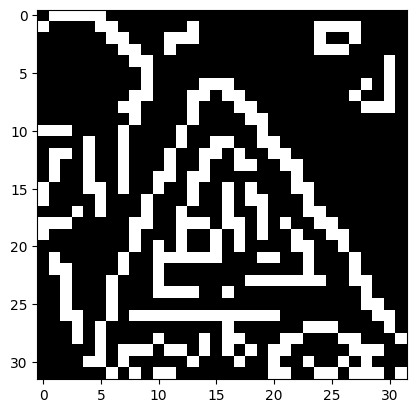

In [12]:
i = 6571
i =6
a = x_train[i][:,:,3] 
c = x_train[i][:,:,0:3]
b = edges_train[i]
plt.imshow(a, cmap= 'gray')

In [23]:
keras.backend.clear_session()

### LeNet Model Architecture

In [24]:
# Building the Model Architecture
# model = Sequential()
# model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)))#************
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(120, activation='relu'))
# model.add(Dense(84, activation='relu'))
# model.add(Dense(16, activation='softmax'))#********************
#Definition of the DNN model

from keras.models import Sequential
from keras.layers import Conv2D , MaxPool2D , Dropout , Flatten , Dense
from keras import regularizers
model = Sequential()
# model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
# model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(rate=0.25))
# model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(rate=0.25))
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(rate=0.5))
# model.add(Dense(16, activation='softmax'))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(32,32,4)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Third Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

model.add(Flatten())
model.add(Dense(256,
                kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                bias_regularizer=regularizers.L2(1e-4),
                activity_regularizer=regularizers.L2(1e-5),
                activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(16,
                kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                bias_regularizer=regularizers.L2(1e-4),
                activity_regularizer=regularizers.L2(1e-5),
                activation='softmax'))

# model.add(layers.Conv2D(filters=32,kernel_size=3,activation='relu',padding='same',input_shape=x_train.shape[1:]))
# model.add(layers.MaxPool2D(strides=2))
# model.add(layers.BatchNormalization())
# model.add(layers.Dropout(0.3))

# #ConvLayer(128 filters) + MaxPooling + BatchNormalization + Dropout
# model.add(layers.Conv2D(filters=128,kernel_size=3,activation='relu',padding='same'))
# model.add(layers.MaxPool2D(strides=2))
# model.add(layers.BatchNormalization())
# model.add(layers.Dropout(0.3))

# #ConvLayer(512 filters) + Dropout + ConvLayer(512 filters) + MaxPooling + BatchNormalization
# model.add(layers.Conv2D(filters=512,kernel_size=3,activation='relu',padding='same'))
# model.add(layers.Dropout(0.3))
# model.add(layers.Conv2D(filters=512,kernel_size=3,activation='relu',padding='same'))
# model.add(layers.MaxPool2D(strides=2))
# model.add(layers.BatchNormalization())

# #Flatten
# model.add(layers.Flatten())

# #2 Dense layers with 4000 hidden units
# model.add(layers.Dense(4000,activation='relu'))
# model.add(layers.Dense(4000,activation='relu'))

# #Dense layer with 1000 hidden units
# model.add(layers.Dense(1000,activation='relu'))

# #Softmax layer for output
# model.add(layers.Dense(16,activation='softmax'))



In [25]:
opt = keras.optimizers.Adam()
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=opt, metrics=['accuracy'])

In [26]:
history = model.fit(x_train, y_train, batch_size=128, epochs=70, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/70
253/253 [==============================] - 5s 18ms/step - loss: 1.9511 - accuracy: 0.3971 - val_loss: 1.2055 - val_accuracy: 0.6620
Epoch 2/70
253/253 [==============================] - 4s 16ms/step - loss: 1.0185 - accuracy: 0.7009 - val_loss: 0.8586 - val_accuracy: 0.7705
Epoch 3/70
253/253 [==============================] - 4s 16ms/step - loss: 0.8139 - accuracy: 0.7711 - val_loss: 0.7353 - val_accuracy: 0.8031
Epoch 4/70
253/253 [==============================] - 4s 16ms/step - loss: 0.7235 - accuracy: 0.7996 - val_loss: 0.7366 - val_accuracy: 0.8000
Epoch 5/70
253/253 [==============================] - 4s 16ms/step - loss: 0.6697 - accuracy: 0.8171 - val_loss: 0.6961 - val_accuracy: 0.8171
Epoch 6/70
253/253 [==============================] - 4s 16ms/step - loss: 0.6359 - accuracy: 0.8284 - val_loss: 0.6539 - val_accuracy: 0.8326
Epoch 7/70
253/253 [==============================] - 4s 16ms/step - loss: 0.6117 - accuracy: 0.8371 - val_loss: 0.6676 - val_accuracy: 0.8225

In [32]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

110/110 [==============================] - 1s 7ms/step - loss: 0.8675 - accuracy: 0.7866
Test Loss: 0.8675065636634827
Test accuracy: 0.7866097092628479


In [33]:
from sklearn.metrics import classification_report as cr
pred = model.predict(x_test).argmax(axis = 1)
clr = cr(y_test.argmax(axis = 1) , pred , output_dict = True)
print(clr)

110/110 [==============================] - 0s 4ms/step
{'0': {'precision': 0.9228486646884273, 'recall': 0.7404761904761905, 'f1-score': 0.821664464993395, 'support': 420}, '1': {'precision': 0.9971305595408895, 'recall': 0.9652777777777778, 'f1-score': 0.9809456598447425, 'support': 720}, '2': {'precision': 0.8043478260869565, 'recall': 0.6641025641025641, 'f1-score': 0.7275280898876404, 'support': 390}, '3': {'precision': 0.75, 'recall': 0.5, 'f1-score': 0.6, 'support': 60}, '4': {'precision': 0.39805825242718446, 'recall': 0.9111111111111111, 'f1-score': 0.5540540540540541, 'support': 90}, '5': {'precision': 0.5964912280701754, 'recall': 0.7555555555555555, 'f1-score': 0.6666666666666666, 'support': 90}, '6': {'precision': 0.9387755102040817, 'recall': 0.7666666666666667, 'f1-score': 0.8440366972477065, 'support': 120}, '7': {'precision': 0.7615384615384615, 'recall': 0.66, 'f1-score': 0.7071428571428571, 'support': 150}, '8': {'precision': 0.4756756756756757, 'recall': 0.9777777777

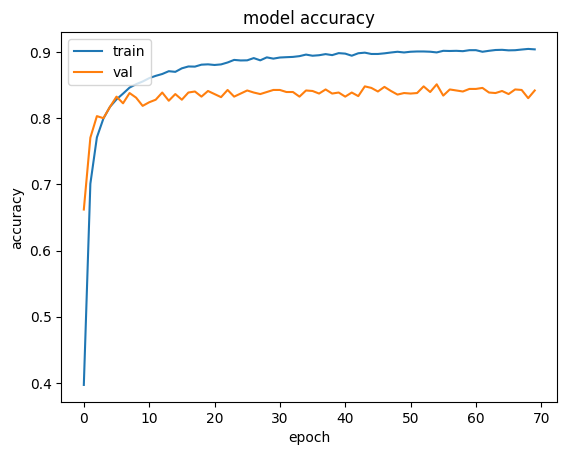

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

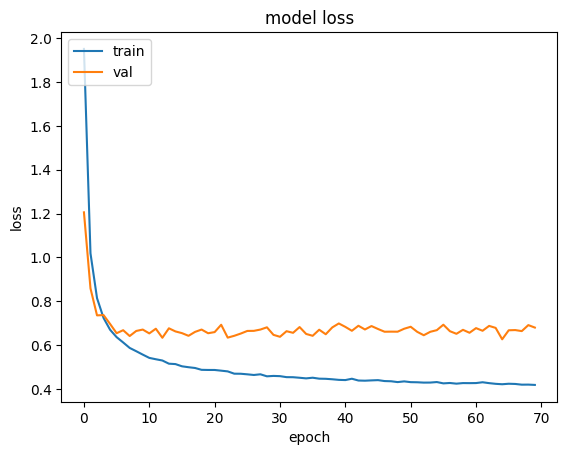

In [35]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [27]:
model.count_params()

323120

In [29]:
print(x_test.shape , x_train.shape , x_valid.shape)

(3510, 32, 32, 4) (32368, 32, 32, 4) (1290, 32, 32, 4)


In [30]:
def classifiy(pred ):
    n = pred.shape[0]
    nc = pred.shape[1]
    new_cy_y = np.zeros((n))
    for i in range(0 ,nc):
        cycle_indx = np.where(pred[:,i] == 1)
        new_cy_y[cycle_indx] = i
    return new_cy_y

In [38]:
pred = model.predict(x_test)
cr = classification_report(classifiy(pred) , classifiy(y_test))
print(cr)

110/110 [==============================] - 1s 4ms/step


NameError: name 'classifiy' is not defined

In [24]:
model_save_dir = "D:\\Project\\Traffic Sign Detection\\TrainedMOdel\\final\\tri_classifier_model_all_edge.h5"  

model.save(model_save_dir)


In [31]:
from keras.models import load_model

model = load_model("D:\\Project\\Traffic Sign Detection\\TrainedMOdel\\final\\tri_classifier_model_acc96.h5")

score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

110/110 [==============================] - 1s 9ms/step - loss: 320.6290 - accuracy: 0.1197
Test Loss: 320.62896728515625
Test accuracy: 0.11965811997652054


## Hope you like it!

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


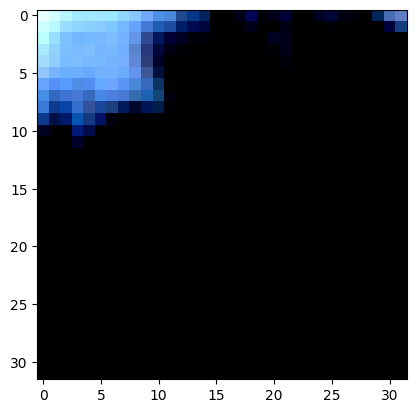

1/1 [==============================] - 1s 955ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [18]:
from matplotlib import pyplot as plt
image = x_train[65:66,:,:]#.transpose(2 , 0 ,1)
plt.imshow(image[0].reshape((32,32,3)))
plt.show()
#y = model.predict_classes(image)
y = (model.predict(image) > 0.5).astype("int32")
print(y[0])
print(y_train[65:66])

ValueError: cannot reshape array of size 3072 into shape (32,32)

In [ ]:
import numpy
x = numpy.where(gray_train_labels == 2)

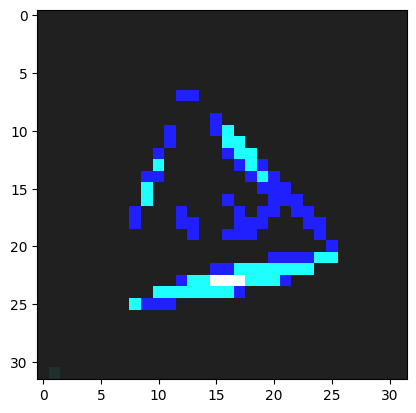

In [167]:
a = x_train[7]
plt.imshow(a)